In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(stringr))
suppressPackageStartupMessages(library(patchwork))

library(plyr)
library(ggbeeswarm)
library(rstatix)
library(ggpubr)
library(ggplot2)

Warning message:
“package ‘dplyr’ was built under R version 4.3.3”
Warning message:
“package ‘tidyr’ was built under R version 4.3.3”
Warning message:
“package ‘tibble’ was built under R version 4.3.3”
Warning message:
“package ‘stringr’ was built under R version 4.3.3”
Warning message:
“package ‘patchwork’ was built under R version 4.3.3”
Warning message:
“package ‘plyr’ was built under R version 4.3.3”
------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Warning message:
“package ‘ggbeeswarm’ was built under R version 4.3.3”
Loading 

In [2]:
df<-read.csv("04_B_cell_flow/Flow_Frequency_CD27neg_effector_B_Isotye.csv")

In [3]:
df <- df %>%
  mutate(`Age Group` = case_when(
    startsWith(donor, "BR1") ~ 'Young',
    TRUE ~ 'Older'
  ))

In [4]:
df<-df %>% mutate(Flu_Day=case_when(timepoint=="day0"~"Day 0", TRUE~"Day 7"))

df$`Age Group`<-factor(df$`Age Group`,levels=c("Young","Older"))

In [5]:
df<-df %>%filter(Isotype=='IgG')

In [6]:
df$Group<-paste0(df$`Age Group`,'_',df$Flu_Day)
df$Group<-factor(df$Group,levels=c('Young_Day 0', 'Older_Day 0','Young_Day 7',
                                      'Older_Day 7'))

In [7]:

write.csv(df %>% filter(timepoint %in% c('day7')) %>% select(donor,Group,`Age Group`,timepoint,frequency_clr),
          "/home//workspace/Source_Data/Extended_Fig6g.csv",row.names=FALSE)

In [8]:
df %>% filter(timepoint %in% c('day7'))

X,donor,timepoint,Isotype,Counts,frequency,frequency_clr,Age Group,Flu_Day,Group
<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<fct>,<chr>,<fct>
103,BR1025,day7,IgG,131,37.21591,1.2411841,Young,Day 7,Young_Day 7
104,BR1031,day7,IgG,1381,58.54175,2.4180307,Young,Day 7,Young_Day 7
105,BR1032,day7,IgG,90,51.72414,1.4988373,Young,Day 7,Young_Day 7
106,BR1047,day7,IgG,118,23.93509,1.4116662,Young,Day 7,Young_Day 7
107,BR1050,day7,IgG,400,39.25417,1.2495390,Young,Day 7,Young_Day 7
108,BR1057,day7,IgG,77,21.32964,1.3213360,Young,Day 7,Young_Day 7
109,BR2013,day7,IgG,90,31.46853,0.9900922,Older,Day 7,Older_Day 7
110,BR2021,day7,IgG,67,23.02405,1.1846152,Older,Day 7,Older_Day 7
111,BR2023,day7,IgG,30,12.00000,0.8921383,Older,Day 7,Older_Day 7


Warning message in geom_point(alpha = 1, size = 0.8, width = 0.3):
“Ignoring unknown parameters: `width`”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message in stat_summary(fun = "median", aes(fill = "Median"), geom = "crossbar", :
“Ignoring unknown parameters: `shape`”


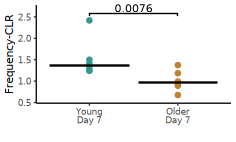

In [10]:
options(repr.plot.width = 40/25.4, repr.plot.height = 45/25.4)

p1<-ggplot(df %>% filter(timepoint %in% c('day7')), aes(Group, frequency_clr, color=`Age Group`)) + 
geom_point(alpha=1.0, size=0.8, width=0.3) +
stat_summary(fun="median", aes(fill="Median"),geom="crossbar", shape=18, size=0.2, 
           color='black', na.rm=T) + 
theme_classic(base_size=6) +  
stat_compare_means( label = "p.format",method='wilcox.test',paired=FALSE,size=2.2,method.args = list(alternative = "less"),
                   label.y=2.5,
  comparisons = list(c("Older_Day 7", "Young_Day 7")))+  

scale_fill_manual(values="black", name="") + 
xlab("") +
scale_color_manual(values = c("Older" = '#bf812d', "Young" = '#35978f'))+
scale_y_continuous(limits = c(NA, NA),
               expand = expansion(mult = c(0.1, 0.1)))+
xlab('')+
ylab('Frequency-CLR') + 
scale_x_discrete(labels = c(
                              "Older_Day 7" = "Older\nDay 7",
                
                              "Young_Day 7" = "Young\nDay 7"))+theme(
panel.border = element_blank())   +
theme(axis.line = element_line(colour = "black"),
  legend.position = "none",
  legend.title = element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  panel.border = element_blank(),
  panel.background = element_blank(),
  strip.background = element_rect(linewidth = 0),
  axis.title.x = element_text(margin = margin(t = 1)))+
  theme(plot.title = element_text(hjust = 0.5))


options(repr.plot.width = 50/25.4, repr.plot.height = 30/25.4)

p1

ggsave('FigureG.pdf',
       p1,
       width = 40/25.4,
       height = 30/25.4)